# TP 3 
#### Monday,  October 12, 2020

## Diffusion equation

The diffusion equation (also called heat equation) 

$$ \partial_t u(x,t) = D \ \nabla^2 u(x,t) $$

where $D$ is the diffusion coefficient, appears on a lot of physical phenomena in mechanics.

The 1D version gives
$$ \partial_t u(x,t) = D \ \partial^2_{xx} u(x,t) $$


### I - Explicit integration scheme

A trivial discretization of the diffusion equation is

$$ \frac{u_i^{n+1}-u_i^n}{\Delta t}  = F(u_i^n) \simeq D \frac{u_{i-1}^{n}- 2 u_i^n + u_{i+1}^{n} }{(\Delta x)^2} $$

with $i$ the space index and $n$ the time index.

Using the Euler method of TP2 write a function **euler(U0,BC,L,dt,t_max)** with $U0$ the initial conditions, $BC$ a scalar for choosing the boundary conditions, $L$ the domain length, $dt$ the time step and $t_{max}$ the total time of the simulation. We suppose $D=1$. 

We want to study the effects of the boundary conditions ($BC$) and the initial conditions ($U0$) using the following relations

- BC1 ==>  $u(0,t) = 0$ and $u(L,t) = 0$
- BC2 ==>  $u(0,t) = 0$  $\partial_x u(L,t) = 0$
- U01 ==>  smooth initial condition $u(x,0) \sim f(\sin(x))$
- U02 ==>  discontinous initial condition $u(x,0) \sim \mathcal{H}(L/2)$ using Heaviside or step function.
    
To illustrate the solution behavior, plot every 100 time steps the solution $u(x\in[0:L])$ on the same figure.
 
Test the stability of the numerical scheme

1. for BC1 and U01 by changing the time step $dt$ ;
2. for the boundary condition BC2 for U01 and U02.    

#### Q 1 - Stability of the numerical scheme

In [437]:
def euler(U0, BC, L, dt, t_max, Nx):    
    # space step
    dx = L/Nx
    x = 0
    
    # initial time t0 = 0
    t = 0
    
    # factor
    F = dt/dx**2
    
    # Initial repartition
    u0 = U0[0] # sinus here

    u_n   = u0                      # u_n
    u_n_1 = np.zeros(np.size(u_n))  # u_n+1
    
    U  = np.array([])
    UU = np.array([])

    for k in range(np.size(dt)):
        for t in range(int(t_max/dt[k])):
            u_n[0]    = 0
            u_n[Nx-1] = 0
            for x in range(1, Nx-1):
                u_n_1[x] = u_n[x] + F[k]*(u_n[x+1] - 2*u_n[x] + u_n[x-1]) 
            u_n = u_n_1
            U = np.append(U, u_n)
        UU = np.append(UU, U)
    return UU

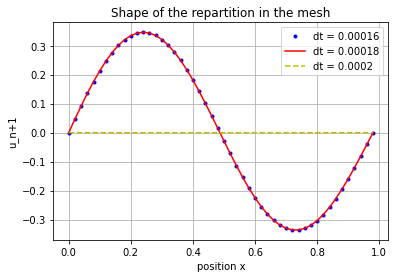

In [661]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------

# Length
L     = 1    # Length of the mesh
T_max = 0.25    # Time of the study

Nx    = 10*5
N_t   = 1250

# steps
dx = L/Nx
dt = np.array(np.dot((T_max/N_t), np.arange(0.8, 1.2, 0.1))) # time step

x  = np.arange(0, L, L/Nx)

U0_1 = np.zeros(Nx)
U0_2 = np.zeros(Nx)

# Initial repartition
U0_1             = np.sin(x*2*np.pi/L) # normalisation sinus
U0_2[:]          = 1
U0_2[:int(Nx/2)] = 0

# -----------------------------------------------------------------------

# Initial repartition
U0 = [U0_1, U0_2]

# BC
BC = [0, 0]

# -----------------------------------------------------------------------

u_sol = np.zeros(Nx)

u_sol = euler(U0, BC, L, dt, T_max, Nx)

# -----------------------------------------------------------------------

# We split the vector u_sol into three subvectors, representing the same solution for different dt

# initialisation vector
u_sol_split  = np.array([])
lim  = np.zeros(256)

# -----------------------------------------------------------------------

# function returning the number of iteration to get to UU, depending on the size of dt
def loop(Nx, T_max, dt, n):
    l = 0
    for i in range(n):
        l += Nx * int(T_max/dt[i])
    return l

# -----------------------------------------------------------------------

# building the limits for the splitted solutions
for k in range(1,p+1):
    lim[k] = loop(Nx, T_max, dt, n=k)

# splitted solutions (one for each dt)
u_sol_split_1 = u_sol[           :int(lim[1])]
u_sol_split_2 = u_sol[int(lim[1]):int(lim[2])]
u_sol_split_3 = u_sol[int(lim[2]):int(lim[3])]

# -----------------------------------------------------------------------

# displaying results
t = 100

c1 = u_sol_split_1[(t-1)*Nx:t*Nx]
c2 = u_sol_split_2[(t-1)*Nx:t*Nx]
c3 = u_sol_split_3[(t-1)*Nx:t*Nx]

plt.plot(x, c1, 'b.', label  = 'dt = {}'.format(dt[0]))
plt.plot(x, c2, 'r-', label  = 'dt = {}'.format(dt[1]))
plt.plot(x, c3, 'y--', label = 'dt = {}'.format(dt[2]))

plt.title('Shape of the repartition in the mesh')
plt.xlabel('position x')
plt.ylabel('u_n+1')

plt.grid('True')

plt.legend()

plt.show()
plt.close()



### II - Explicit integration scheme - vectorized version

#### We want to accelerate the computation, then we have to vectorize the loop into the Euler function. 

1. Give a vectorization of the loop over space in Euler function.
2. Propose a new function **Euler_new(U0,BC,Vectorized,L,dt,t_max))**
with Vectorized a scalar (equal to 1 or 0) switching between "vectorized" and "non-vectorized" implementation.
3. Compute and compare the execution time of both approaches.


### III - Implicit integration schema

The implicit version comes from 
$$ \frac{u_i^{n+1}-u_i^n}{\Delta t}  = F(u_{i+1}^n)$$

1. Write the implicit scheme as $A x = b$
2. Implement the algorithm into a **Euler_imp(U0,BC,Vectorized,L,dt,t_max))** function.
3. Redo the same analyse than before.
4. Compute the time execution and compare it against the explicit approach.